In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
random_seed = 42
labels = ['Normal','Fraud']

In [2]:
data = pd.read_csv('creditcard.csv',sep=',')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().values.any()

False

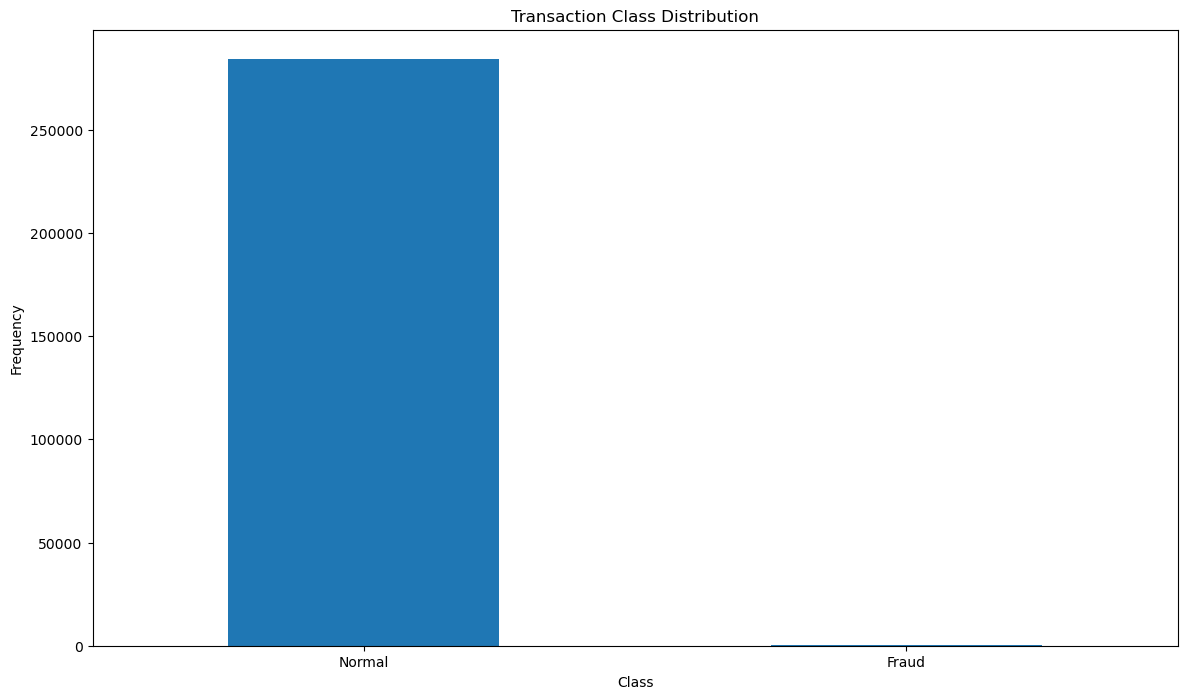

In [9]:
count_classes = pd.value_counts(data['Class'], sort= True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2),labels)
plt.show()

In [11]:
fraud_data = data[data['Class']== 1]
normal_data = data[data['Class'] == 0]

In [12]:
fraud_data.shape,normal_data.shape

((492, 31), (284315, 31))

In [13]:
fraud_data['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal_data['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

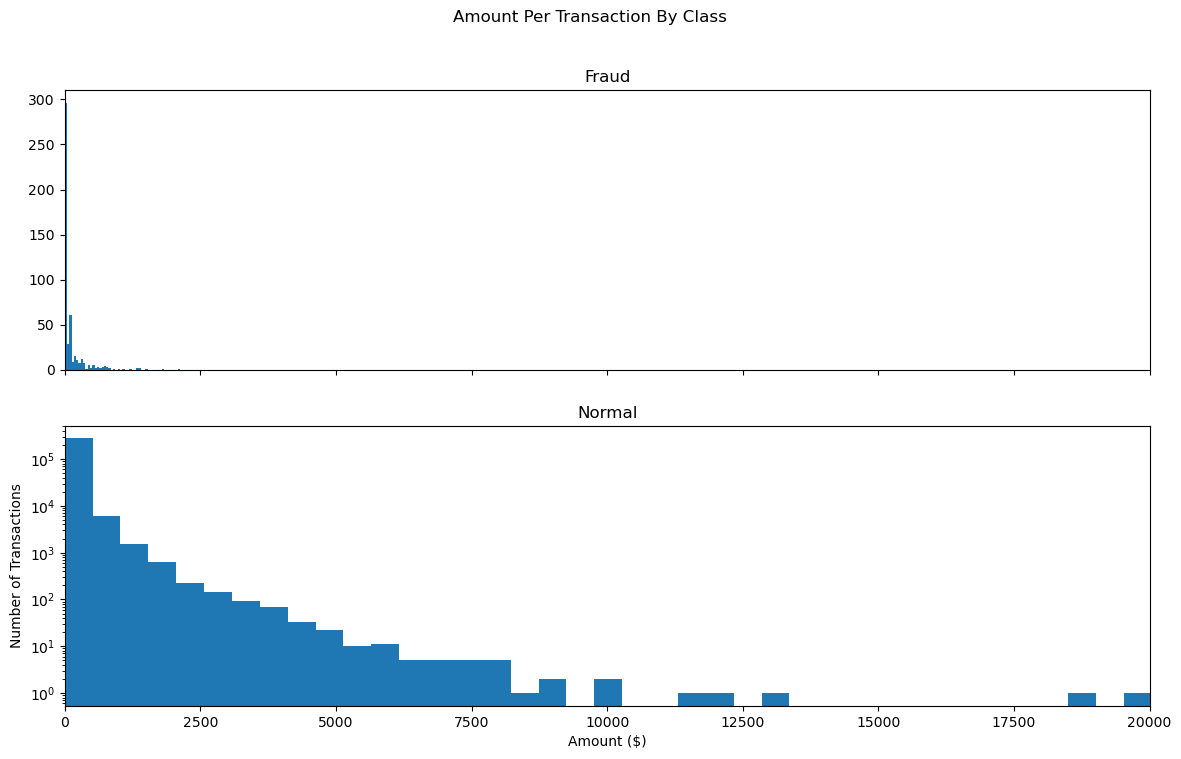

In [21]:
f,(ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amount Per Transaction By Class')
bins = 50
ax1.hist(fraud_data.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal_data.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

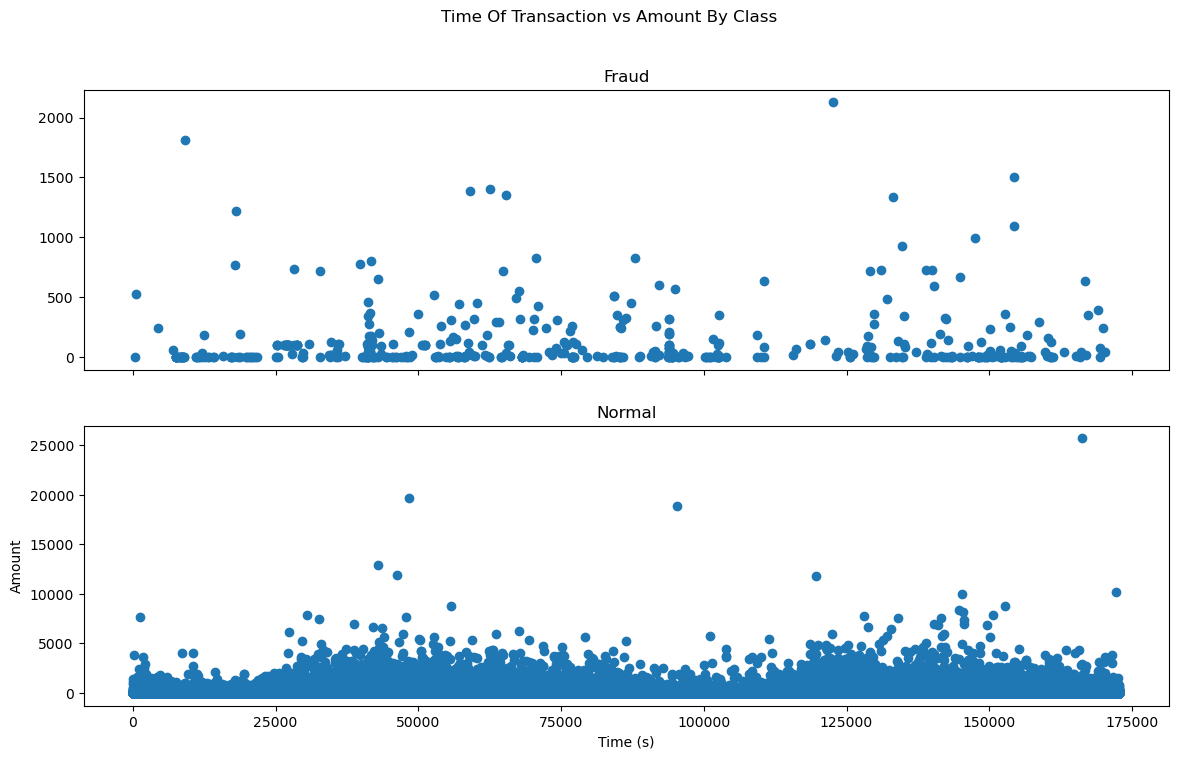

In [20]:
f,(ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Time Of Transaction vs Amount By Class')
ax1.scatter(fraud_data.Time,fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal_data.Time,normal_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (s)')
plt.ylabel('Amount')
plt.show()

In [22]:
data_subset = data.sample(frac=0.1,random_state=1)
data_subset.shape

(28481, 31)

In [23]:
print("Actual Data Shape:",data.shape)
print("Subset Data Shape:",data_subset.shape)

Actual Data Shape: (284807, 31)
Subset Data Shape: (28481, 31)


In [25]:
fraud_subset_data = data_subset[data_subset['Class']==1]
normal_subset_data = data_subset[data_subset['Class']==0]
outlier_fraction = float(len(fraud_subset_data))/float(len(normal_subset_data))

In [26]:
print('Outlier Fraction: {}'.format(outlier_fraction))
print('Fraud Cases: {}'.format(len(fraud_subset_data)))
print('Normal Cases: {}'.format(len(normal_subset_data)))

Outlier Fraction: 0.0017234102419808666
Fraud Cases: 49
Normal Cases: 28432


<AxesSubplot:>

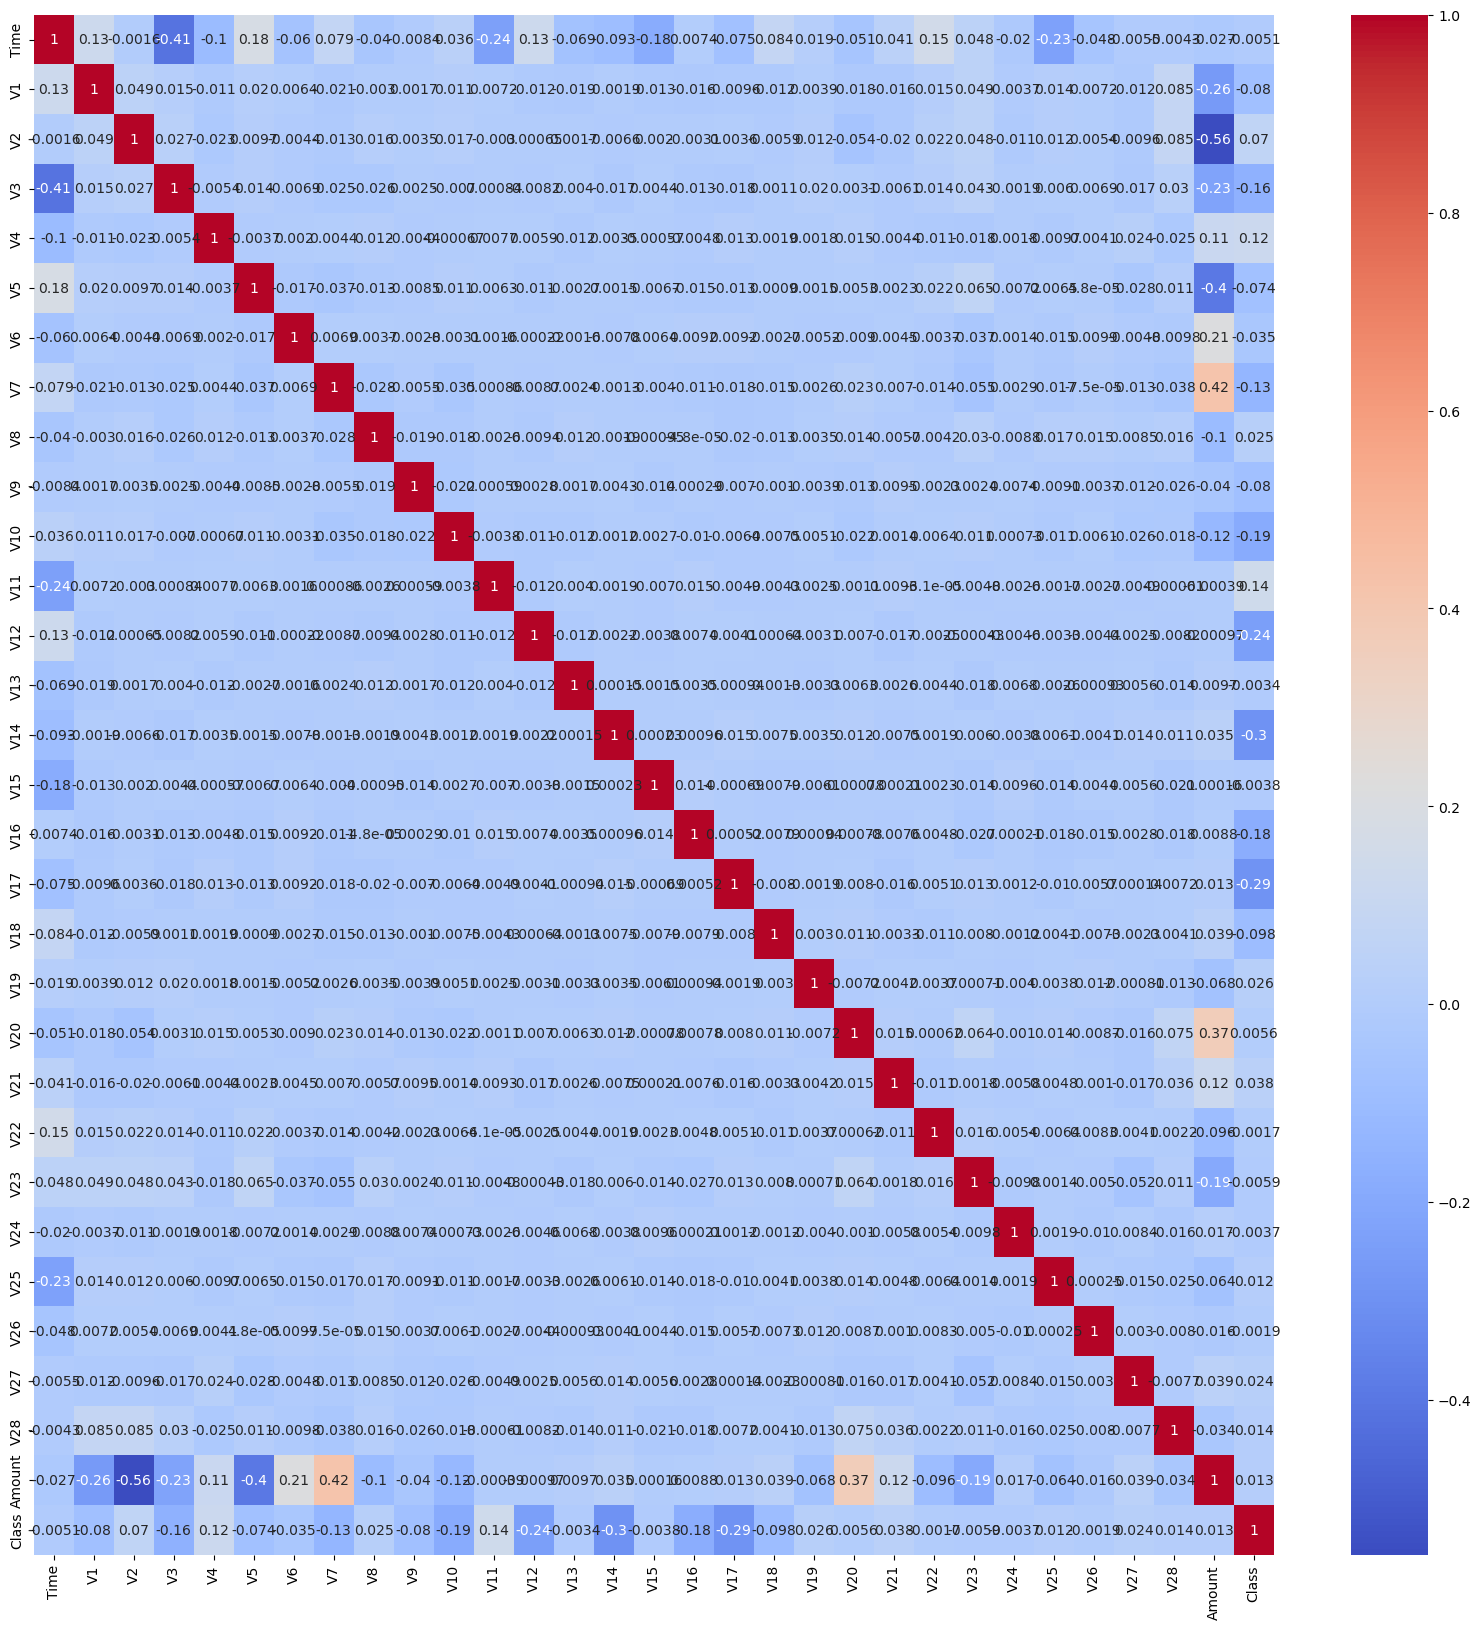

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(data_subset.corr(),annot=True,cmap='coolwarm')

In [48]:
X = data_subset.iloc[:,:-1].values
y = data_subset.iloc[:,-1].values
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))

In [55]:
classifiers = {
    'Isolation Forest' : IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    'Local Outlier Factor' : LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski', p=2,
                                               metric_params=None, contamination=outlier_fraction),
    'Support Vector Machine' : OneClassSVM(kernel='rbf',degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)
}

In [59]:
n_outliers = len(fraud_subset_data)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == 'Support Vector Machine':
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    print("{}'s Erros: {}".format(clf_name,n_errors))
    print("Accuracy Score: {}".format(accuracy_score(y,y_pred)))
    print("Classification Report:")
    print(classification_report(y,y_pred))

Isolation Forest's Erros: 73
Accuracy Score: 0.9974368877497279
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor's Erros: 97
Accuracy Score: 0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine's Erros: 8515
Accuracy Score: 0.7010287560127805
Classification Report:
              precision    recall  f1-score   support

           0      

#### Observations :
- Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
- Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases